### 导入模块

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 数据准备

In [2]:
import pandas as pd
import numpy as np
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x': np.arange(1, 101), 
                     'y': np.random.normal(0, 4, 100)})

# 利用官方数据集 https://github.com/mwaskom/seaborn-data
# titanic = sns.load_dataset("titanic")
# iris = sns.load_dataset("iris")

# 如果下载较慢，或加载失败，可以下载到本地，然后加载本地路径
titanic = sns.load_dataset('titanic',data_home='seaborn-data',cache=True)
iris = sns.load_dataset("iris",data_home='seaborn-data',cache=True)

#### 创建画布和一个子图

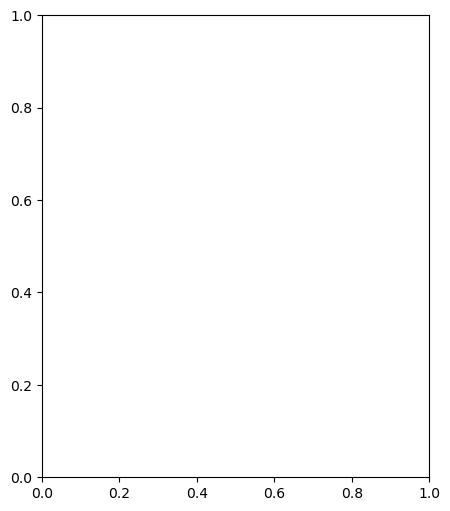

In [3]:
f, ax = plt.subplots(figsize=(5, 6))

### seaborn 样式

In [4]:
sns.set() # 重置seaborn的默认值
sns.set_style("whitegrid")    # 设置matplotlib参数
sns.set_style("ticks",        # 设置matplotlib参数
              {"xtick.major.size": 8, 
               "ytick.major.size": 8})
sns.axes_style("whitegrid")   # 返回一个由参数组成的字典，或使用with来临时设置样式

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

#### 设置绘图上下文参数、调色板、Axisgrid对象设置

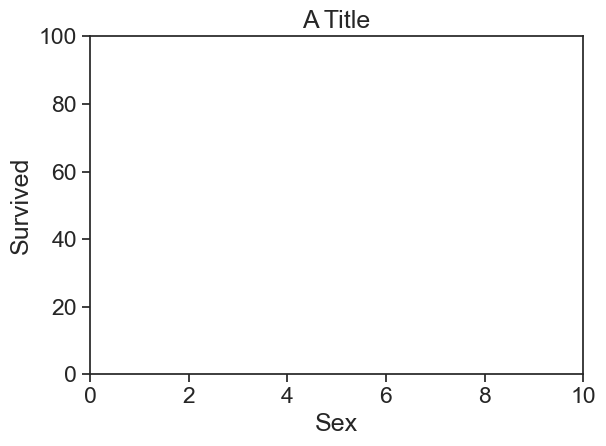

In [13]:
# # 设置绘图上下文参数
# sns.set_context("talk")        # 设置上下文为“talk”
 
# sns.set_context("notebook",   # 设置上下文为"notebook"，缩放字体元素和覆盖参数映射
#                 font_scale=1.5, 
#                 rc={"lines.linewidth":2.5})

# # 设置调色板
# sns.set_palette("husl",3) # 定义调色板
# sns.color_palette("husl") # 用with使用临时设置调色板
 
# flatui = ["#9b59b6","#3498db","#95a5a6",
#           "#e74c3c","#34495e","#2ecc71"] 
# sns.set_palette(flatui)  # 自定义调色板

# # # 设置Axisgrid对象设置
# # g = sns.FacetGrid(titanic, col="sex", row="class", margin_titles=True)
# # g.despine(left=True)      # 隐藏左边线 
# # g.set_ylabels("Survived") # 设置y轴的标签
# # g.set_xticklabels(rotation=45)      # 为x设置刻度标签
# # g.set_axis_labels("Survived","Sex") # 设置轴标签
# # # h.set(xlim=(0,5),         # 设置x轴和y轴的极限和刻度
# # #       ylim=(0,5),
# # #       xticks=[0,2.5,5],
# # #       yticks=[0,2.5,5])

# # plt设置
# plt.title("A Title")    # 添加图标题
# plt.ylabel("Survived")  # 调整y轴标签
# plt.xlabel("Sex")       # 调整x轴的标签
# plt.ylim(0,100)         # 调整y轴的上下限
# plt.xlim(0,10)          # 调整x轴的限制
# plt.setp(ax,yticks=[0,5]) # 调整绘图属性
# plt.tight_layout()      # 次要情节调整参数

# # 展示或者保存图片
# # plt.show()
# # plt.savefig("foo.png")
# # plt.savefig("foo.png",   # 保存透明图片
# #             transparent=True)
 
# # plt.cla()   # 清除轴
# # plt.clf()   # 清除整个图片
# # plt.close() # 关闭窗口

### Seaborn绘图

#### **relplot**

这是一个图形级别的函数，它用散点图和线图两种常用的手段来表现统计关系。hue, col分类依据,size将产生不同大小的元素的变量分组,aspect长宽比,legend_full每组均有条目。

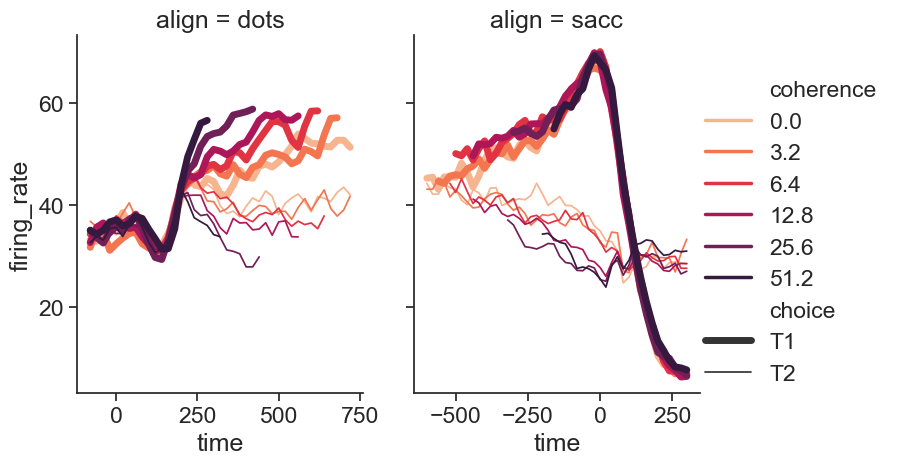

In [6]:
dots = sns.load_dataset('dots',
            data_home='seaborn-data',
            cache=True)
# 将调色板定义为一个列表，以指定精确的值
palette = sns.color_palette("rocket_r")
 
# 在两个切面上画线
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", 
    col="align", kind="line", 
    size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, 
    facet_kws=dict(sharex=False),
)

#### **散点图scatterplot**

<Axes: xlabel='carat', ylabel='price'>

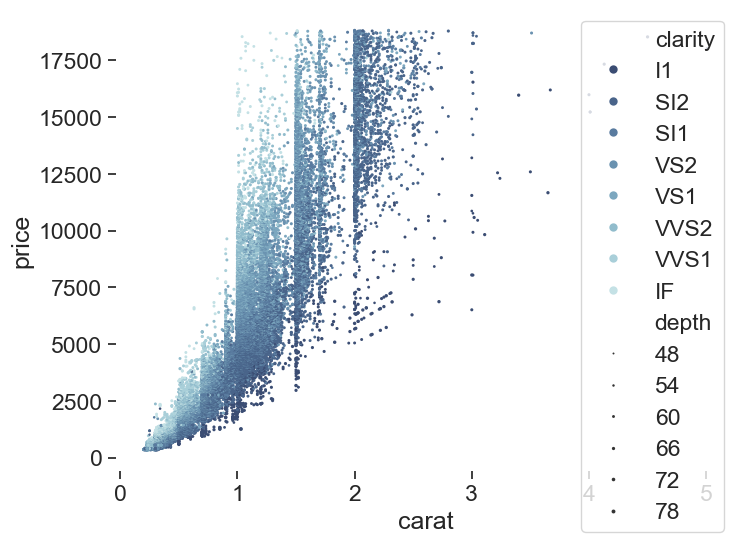

In [7]:
diamonds = sns.load_dataset('diamonds',data_home='seaborn-data',cache=True)
 
# 绘制散点图，同时指定不同的点颜色和大小
f, ax = plt.subplots(figsize=(8, 6))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

#### **折线图lineplot**

seaborn 里的lineplot函数所传数据必须为一个pandas数组

<Axes: xlabel='timepoint', ylabel='signal'>

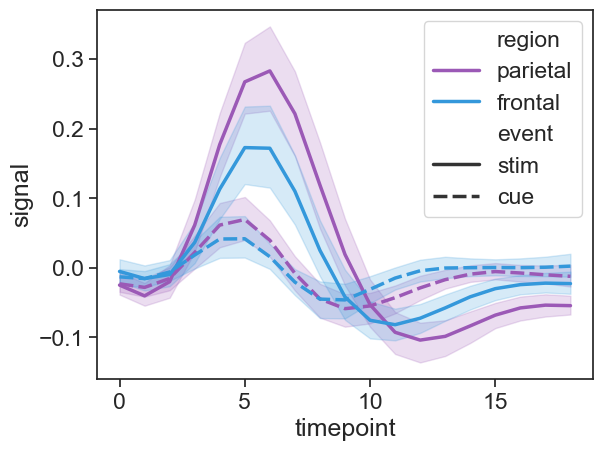

In [8]:
fmri = sns.load_dataset('fmri',data_home='seaborn-data',cache=True)
# 绘制不同事件和地区的响应
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

#### **成组的柱状图catplot**

分类图表的接口，通过指定kind参数可以画出以下八种图
 - stripplot 分类散点图
 - swarmplot 能够显示分布密度的分类散点图
 - boxplot 箱图
 - violinplot 小提琴图
 - boxenplot 增强箱图
 - pointplot 点图
 - barplot 条形图
 - countplot 计数图

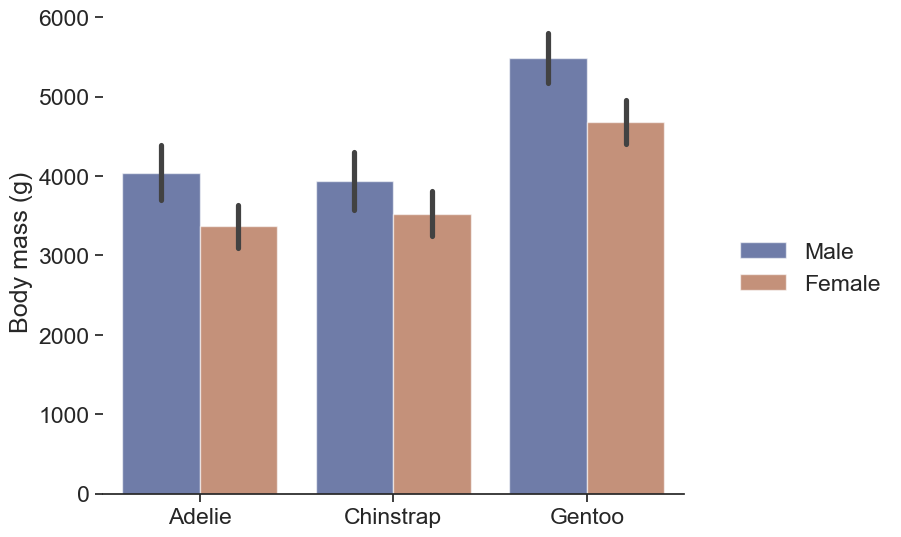

In [9]:
penguins = sns.load_dataset('penguins',data_home='seaborn-data',cache=True)
# 按物种和性别画一个嵌套的引线图
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
g.fig.set_size_inches(10,6) # 设置画布大小

#### **分类散点图stripplot**

<Axes: xlabel='species', ylabel='petal_length'>

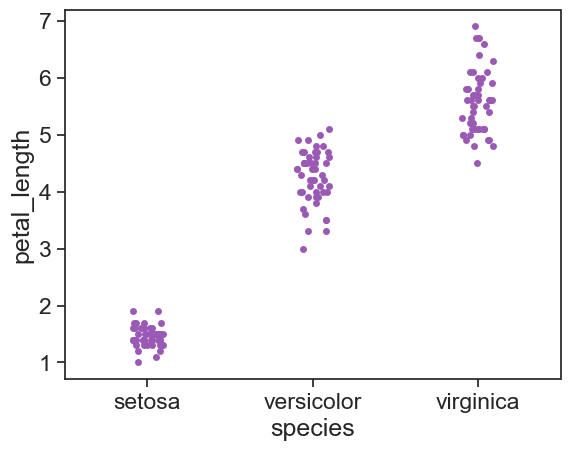

In [10]:
sns.stripplot(x="species", 
              y="petal_length", 
              data=iris)

#### **无重叠点的分类散点图swarmplot**

能够显示分布密度的分类散点图。

<Axes: xlabel='species', ylabel='petal_length'>

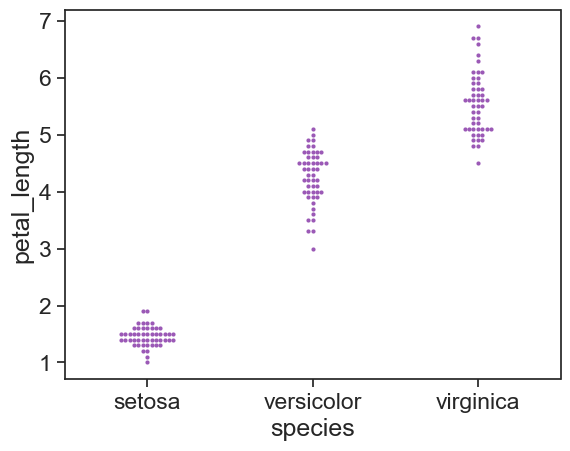

In [15]:
sns.swarmplot(x="species",
              y="petal_length",
              data=iris, size=3) # 额外设置点的大小，能够完整显示内容

#### **柱状图barplot**

用散点符号显示点估计和置信区间

<Axes: xlabel='sex', ylabel='survived'>

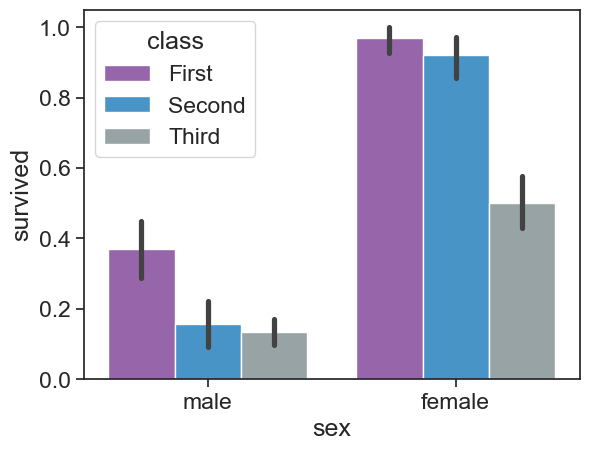

In [16]:
sns.barplot(x="sex",
            y="survived",
            hue="class",
            data=titanic)

#### **计数图countplot**

<Axes: xlabel='deck', ylabel='count'>

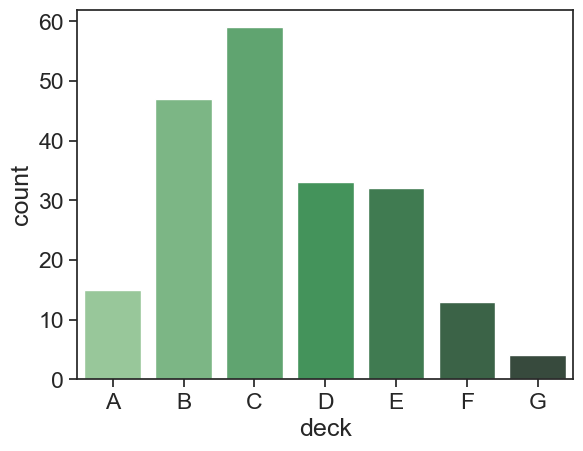

In [21]:
# 显示观测次数
sns.countplot(x="deck",
              hue="deck", legend=False, # 一定要写标签，但是可以用legend=False取消显示
              data=titanic,
              palette="Greens_d")

#### **点图pointplot**

用矩形条显示点估计和置信区间

<Axes: xlabel='class', ylabel='survived'>

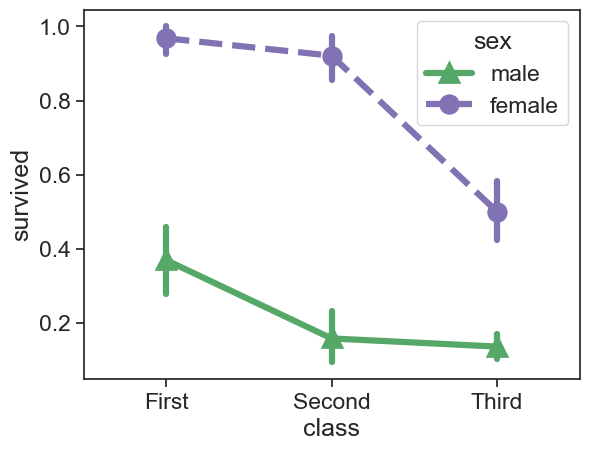

In [23]:
sns.pointplot(x="class",
              y="survived",
              hue="sex",
              data=titanic,
              palette={"male":"g", "female":"m"},
              markers=["^","o"],
              linestyles=["-","--"])

In [ ]:
tips = sns.load_dataset('tips',data_home='seaborn-data',cache=True)